In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
from contour_visualization import picture_plot, MixtureModel

15:59:00.230 WARNING :: Using NumPy C-API based implementation for BLAS functions.


In [3]:
import pickle
import matplotlib.pyplot as plt

In [4]:
import logging

In [5]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [6]:
%load_ext autoreload
%autoreload

In [7]:
logger = logging.getLogger("contour_visualization.picture_cross")
logger.setLevel(logging.INFO)

In [8]:
model_test = pickle.load(open("../../fitted_models/mcg_mpg_map.mdl", "rb"))

In [9]:
model_test.data.columns

Index(['transmission', 'cylinder', 'car_size', 'year', 'mpg_city',
       'mpg_highway', 'displacement'],
      dtype='object')

In [10]:
model_test.data

transmission cylinder car_size  year  mpg_city  mpg_highway  \
250        lock-up      few  midsize  1995      18.0         24.0   
251         manual      few    small  1999      21.0         29.0   
252         manual      few  midsize  2001      19.0         27.0   
253        lock-up      few    small  1996      25.0         31.0   
254         manual      few    small  1988      33.0         39.0   
...            ...      ...      ...   ...       ...          ...   
23532      lock-up      few    small  1997      23.0         31.0   
23533       manual      few  midsize  2007      17.0         23.0   
23534       manual      few    large  1989      19.0         22.0   
23535       manual      few    large  1985      17.0         19.0   
23536         auto   medium  midsize  2001      13.0         16.0   

       displacement  
250          2.3452  
251          2.0000  
252          2.0000  
253          1.3284  
254          1.3284  
...             ...  
23532        1.9844  
23533        2.3000  
23534        2.2632  
23535        2.4600  
23536        5.5000  

[23287 rows x 7 columns]

In [11]:
model_cit_high = MixtureModel.MixtureModel(model_test.data[["mpg_city", "mpg_highway"]])

In [12]:
model_dis_cit = MixtureModel.MixtureModel(model_test.data[["displacement", "mpg_city"]])

In [13]:
model_dis_high = MixtureModel.MixtureModel(model_test.data[["displacement", "mpg_highway"]])

In [14]:
dists = [model_cit_high.get_gaussians(), model_dis_cit.get_gaussians(), model_dis_high.get_gaussians()]

15:59:01.376 INFO :: Means[0]: [0.27882061 0.28885445]
15:59:01.378 INFO :: Cov-Matrix[0]: [[0.00342819 0.0030972 ]
 [0.0030972  0.00382949]]
15:59:01.378 INFO :: weights[0]: 0.501601101618255
15:59:01.380 INFO :: Means[1]: [0.38703093 0.36475431]
15:59:01.380 INFO :: Cov-Matrix[1]: [[0.01861805 0.01617742]
 [0.01617742 0.01636989]]
15:59:01.381 INFO :: weights[1]: 0.17398321647985268
15:59:01.382 INFO :: Means[2]: [0.18302925 0.15264898]
15:59:01.383 INFO :: Cov-Matrix[2]: [[0.00329487 0.00281249]
 [0.00281249 0.00313126]]
15:59:01.383 INFO :: weights[2]: 0.3244156819019392
15:59:01.384 INFO :: Means[0]: [0.24597522 0.35902961]
15:59:01.385 INFO :: Cov-Matrix[0]: [[ 0.00243874 -0.0035159 ]
 [-0.0035159   0.01075641]]
15:59:01.386 INFO :: weights[0]: 0.35774114258486056
15:59:01.387 INFO :: Means[1]: [0.39680617 0.24245591]
15:59:01.388 INFO :: Cov-Matrix[1]: [[ 0.00939484 -0.00276979]
 [-0.00276979  0.00148904]]
15:59:01.388 INFO :: weights[1]: 0.43341828941600985
15:59:01.390 INFO ::

In [15]:
import numpy as np

In [16]:
model_cit_high.estimator.predict_proba([(1,0)])

array([[6.83626593e-139, 1.00000000e+000, 1.31689202e-178]])

In [17]:
dists[0][0].get_density((0.2,0.2))

10.252702617977839

In [18]:
np.linalg.eigh(dists[0][0].cov_matrix)

(array([0.00026258, 0.00336627]), array([[-0.72960557,  0.6838682 ],
        [ 0.6838682 ,  0.72960557]]))

15:59:01.941 WARNING :: points in grid of z-coordinates too similar


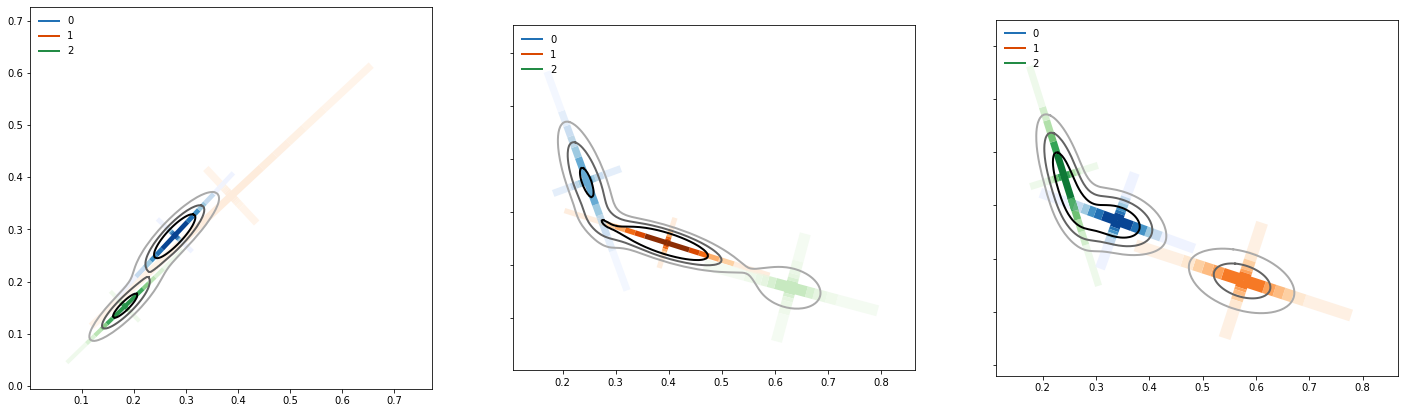

In [19]:
picture_plot.plot_images(dists, crosses=True, contour_lines=True, contour_line_level=2)

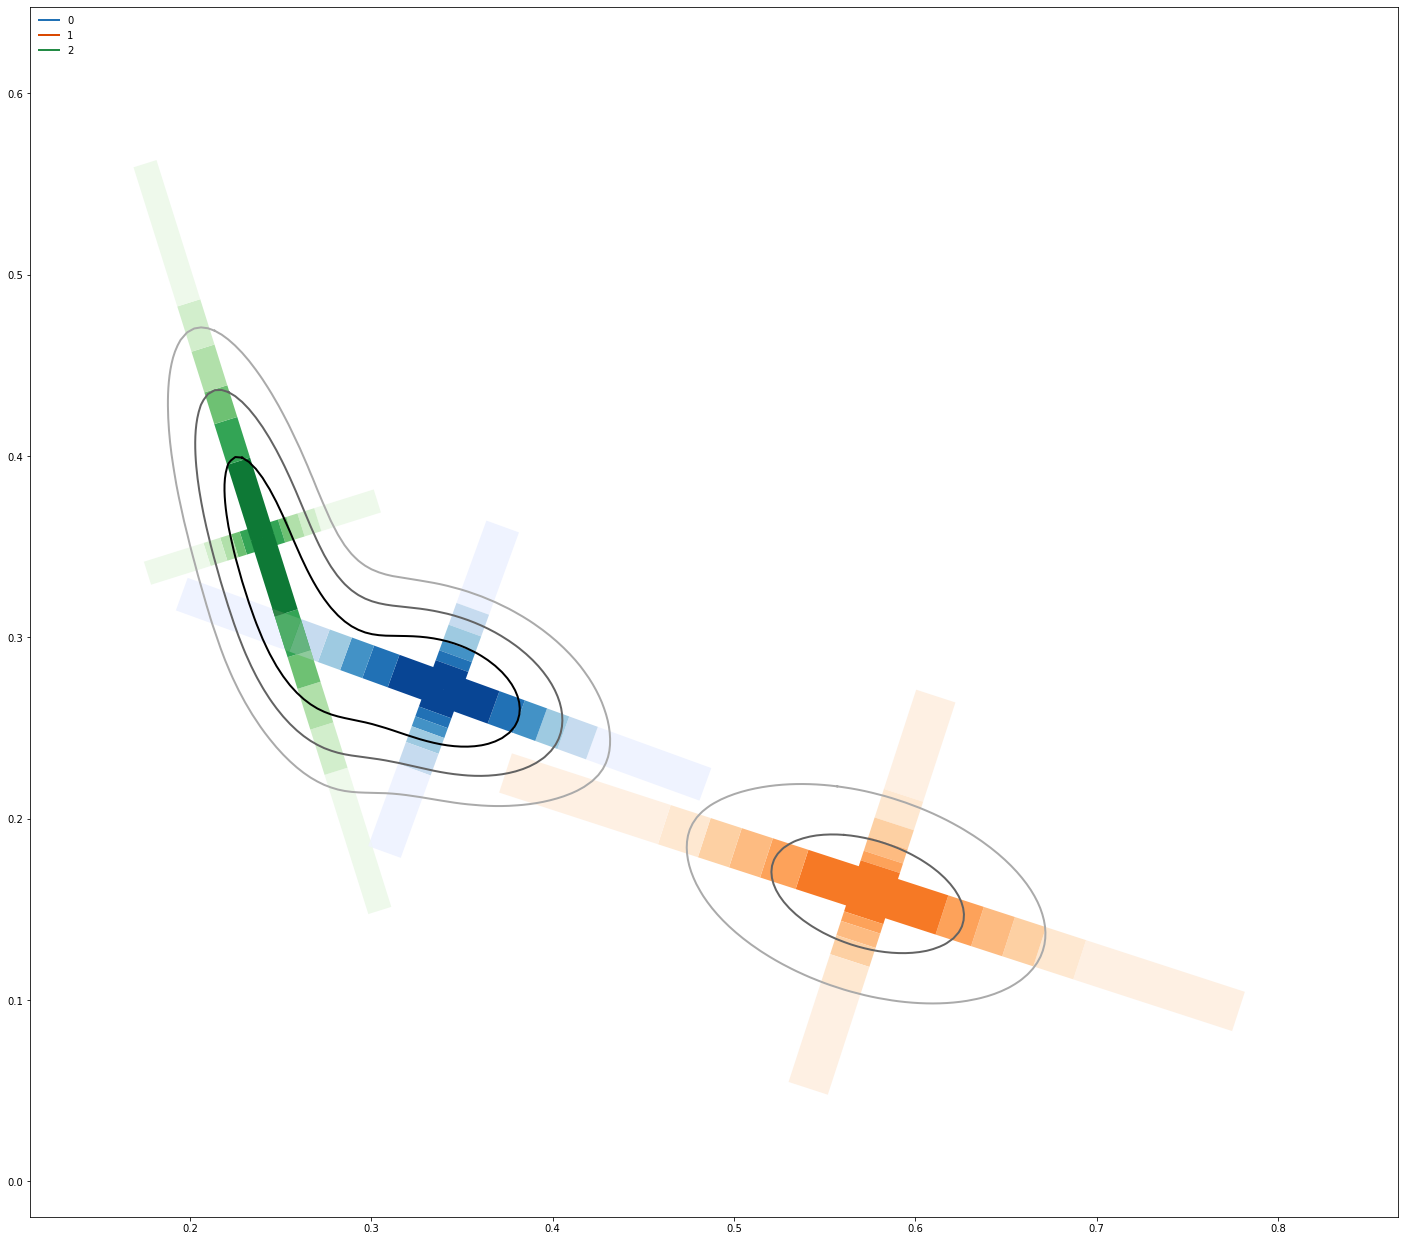

In [20]:
picture_plot.plot_images(dists[2:3], crosses=True, contour_lines=True, contour_line_level=2)

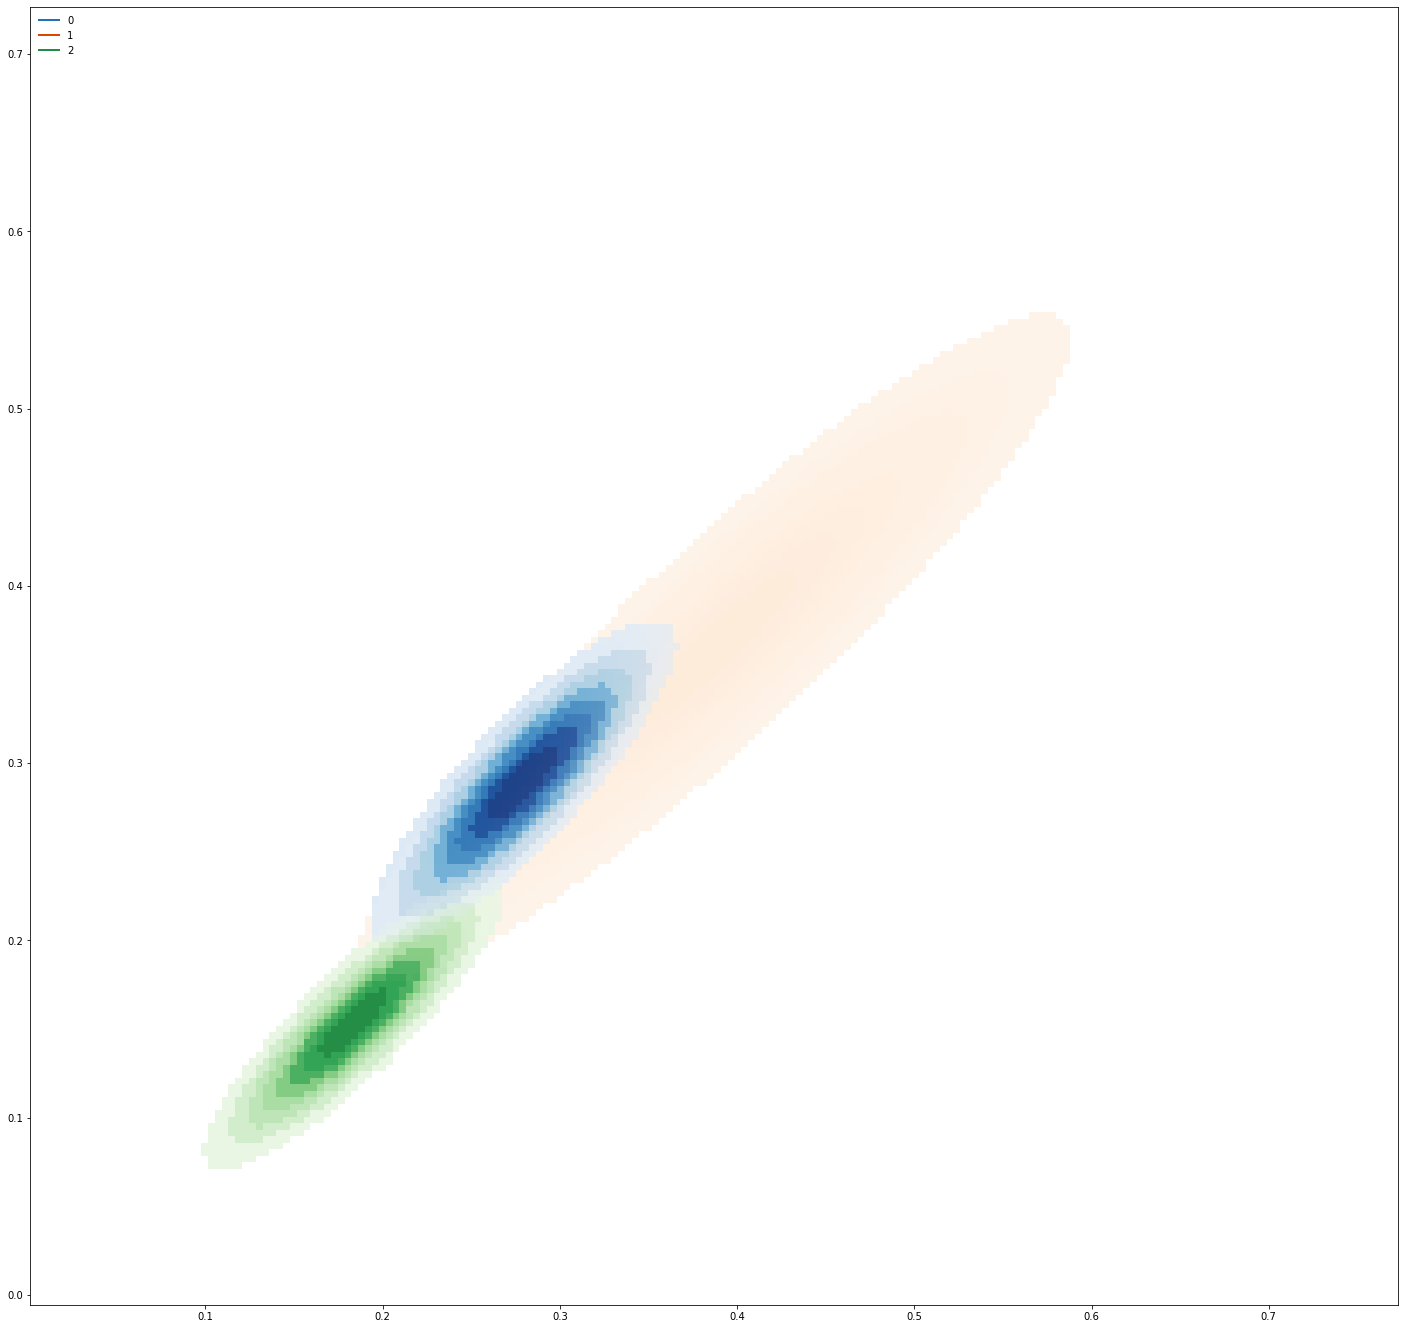

In [21]:
picture_plot.plot_images([dists[0],], contours=True)

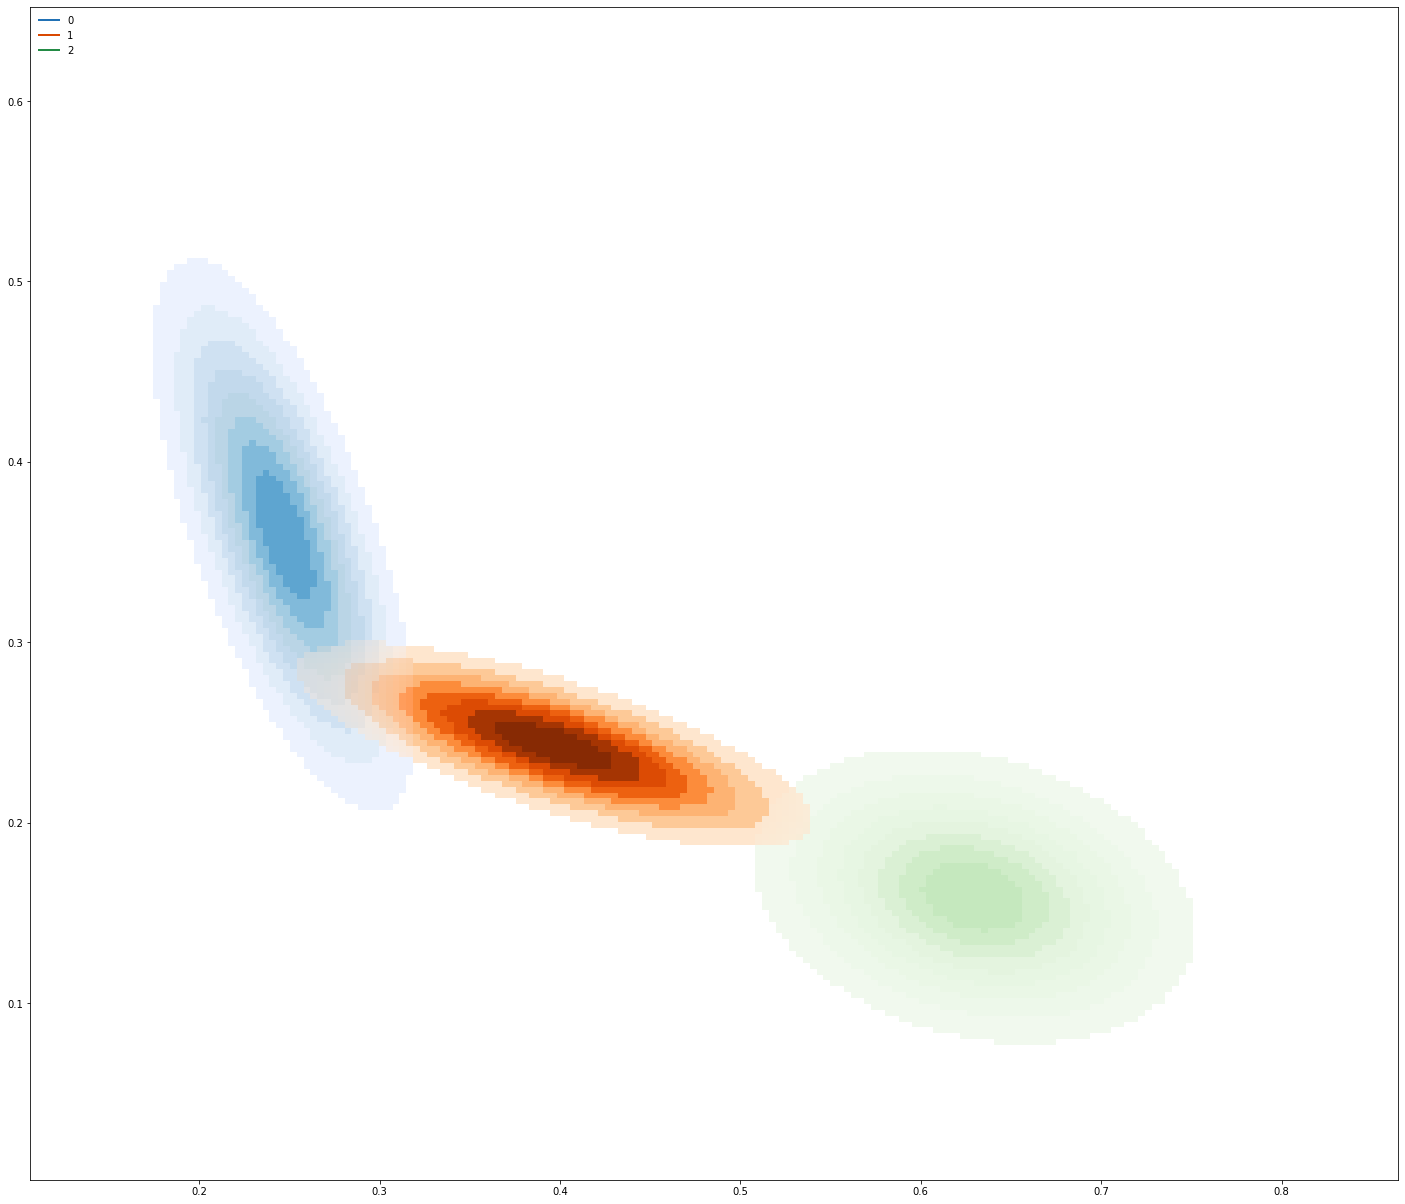

In [22]:
picture_plot.plot_images([dists[1],], contours=True)

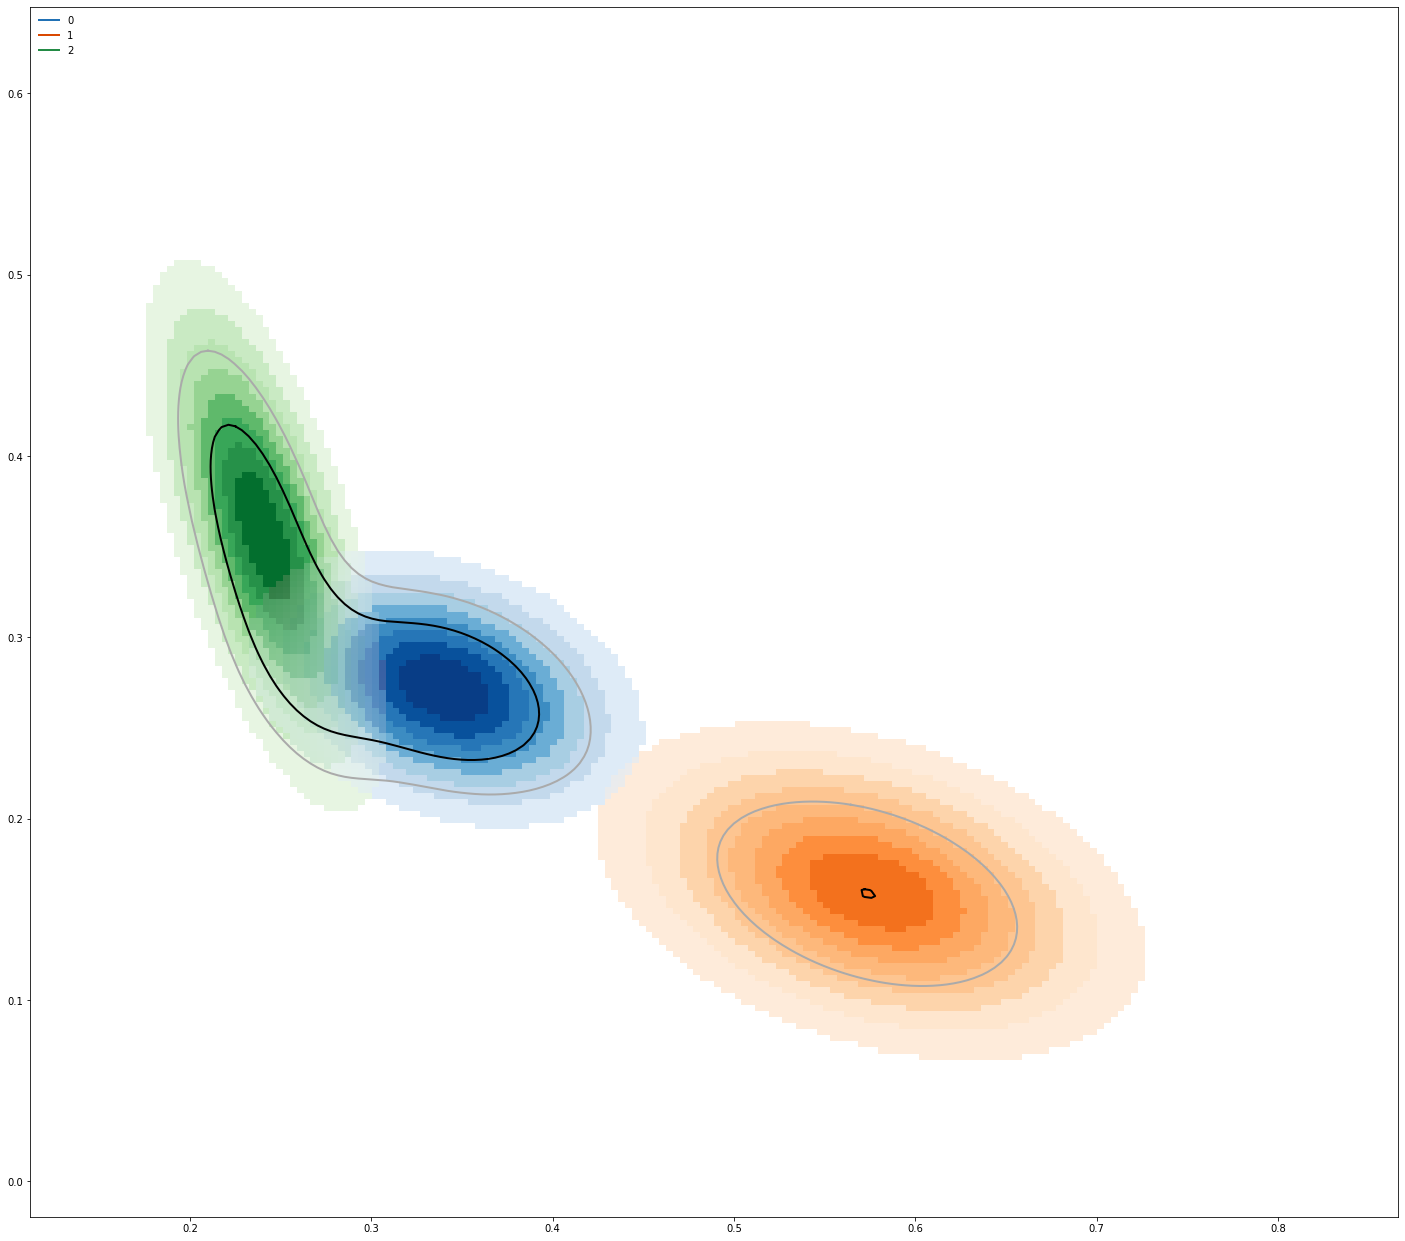

In [23]:
picture_plot.plot_images([dists[2],], contours=True, contour_lines=True, contour_line_level=1)

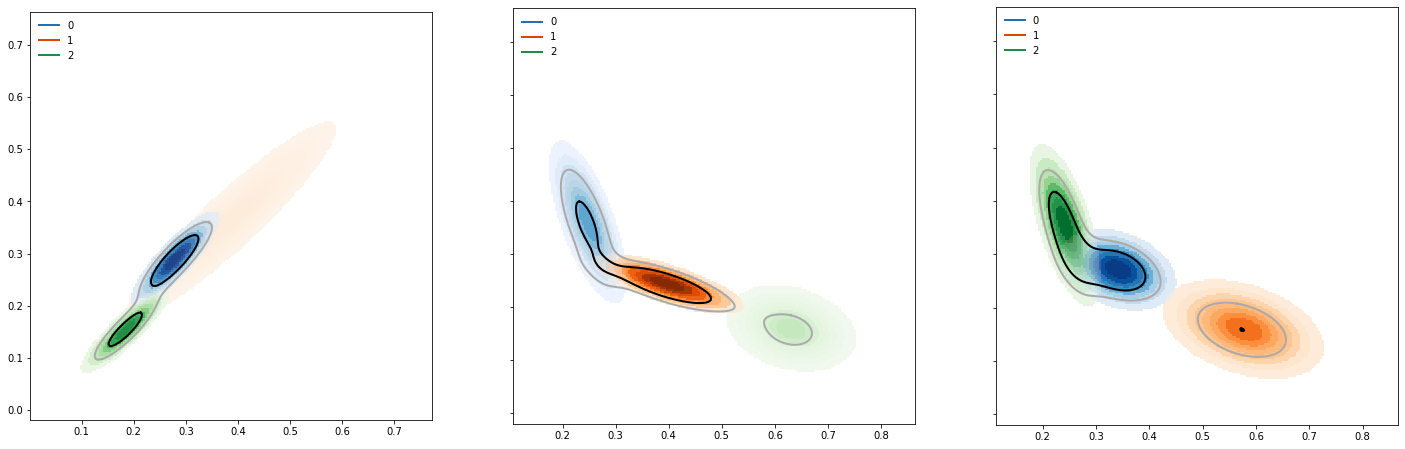

In [24]:
picture_plot.plot_images(dists, contours=True, contour_lines=True, contour_line_level=1)

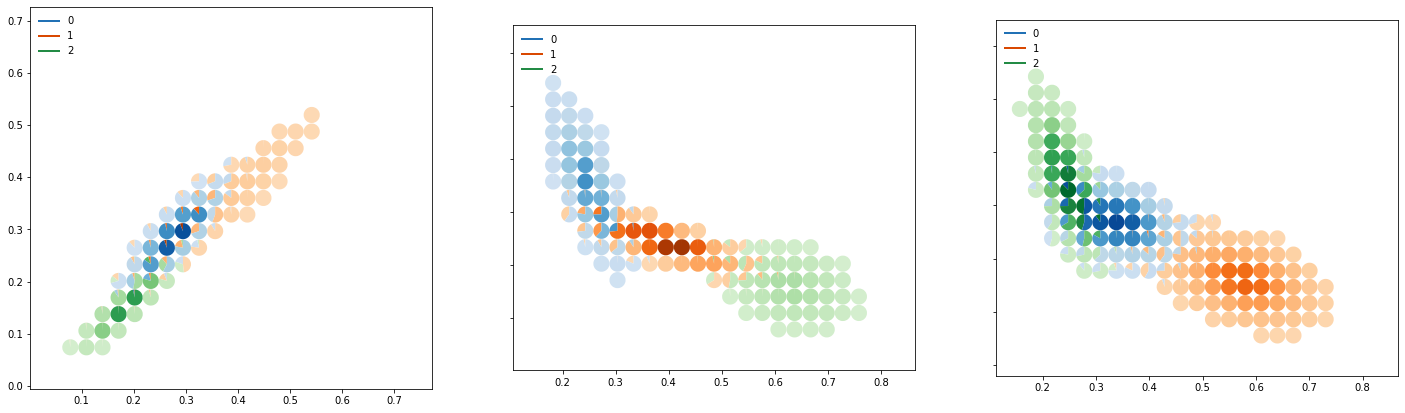

In [25]:
picture_plot.plot_images(dists, pie_charts=True, pie_num=25)